In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

SAVE_PLOTS=False

cs137_path = r'data\sipm_spectroscopy\vp2ps_20250317-131806_cs137_1h.csv'
na22_path = r'data\sipm_spectroscopy\vp2ps_20250317-162839_na22_1h.csv'
co60_path = r'data\sipm_spectroscopy\vp2ps_20250317-150221_co60_1h.csv'

In [30]:
cs137_compton_V = 14
cs137_compton_kev = 450

cs137_photopeak_V = 20.5
cs137_photopeak_kev= 662

na22_photopeak_V = 16.5
na22_photopeak_kev = 511
na22_photopeak2_V = 36.5
na22_photopeak2_kev = 1275

co60_compton_V = 28
co60_compton_kev = 963
co60_photopeak_V = 33.5
co60_photopeak_kev = 1173
co60_photopeak2_V = 38.5
co60_photopeak2_kev = 1332

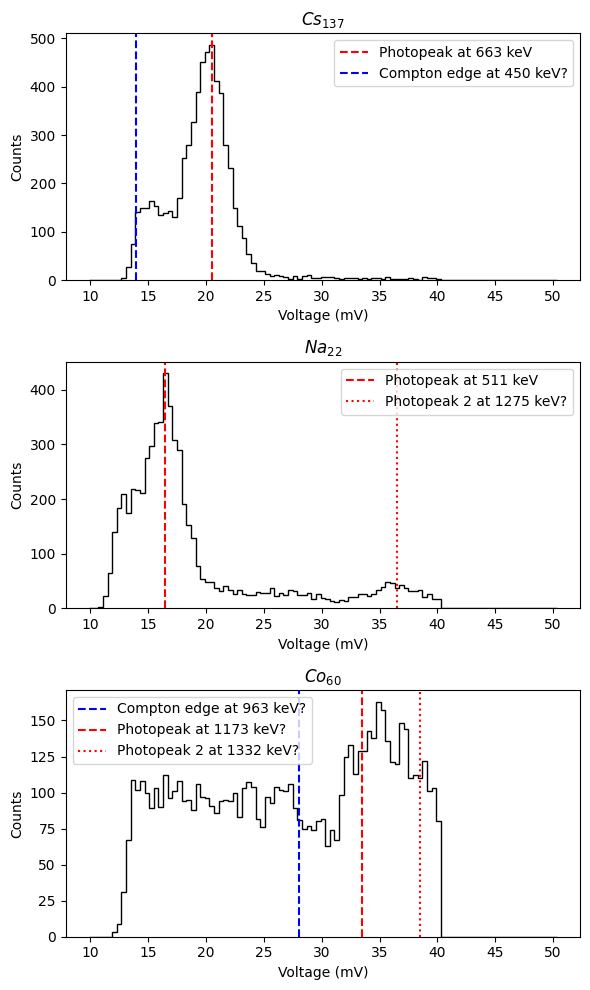

In [31]:

cs137 = pd.read_csv(cs137_path)
na22 = pd.read_csv(na22_path)
co60 = pd.read_csv(co60_path)

def process_df(df):
    V_min = 1 #mV
    V_max = 40 #mV
    df['mV'] = df['V']*1000
    df = df[(df['mV'] > V_min) & (df['mV'] < V_max)]
    return df

cs137 = process_df(cs137)
na22 = process_df(na22)
co60 = process_df(co60)

fig, ax = plt.subplots(3, 1, figsize=(6, 10))

def generate_bins(low_cut, high_cut, step):
    step = 0.4
    hist_min = low_cut
    hist_max = high_cut
    return np.arange(hist_min - 0.1, hist_max + step, step)

range = (10, 50)
bins = generate_bins(range[0], range[1], 0.4)

ax[0].hist(cs137['mV'], bins=bins,range = range, histtype='step', color ='black')
ax[0].set_title(r'$Cs_{137}$')
# draw vertical line at 662 keV
ax[0].axvline(x=cs137_photopeak_V, color='r', linestyle='--', label='Photopeak at 663 keV')
ax[0].axvline(x=cs137_compton_V, color='b', linestyle='--', label='Compton edge at 450 keV?')

ax[1].hist(na22['mV'], bins=bins,range = range, histtype='step', color ='black')
ax[1].set_title(r'$Na_{22}$')

ax[1].axvline(x=na22_photopeak_V, color='r', linestyle='--', label='Photopeak at 511 keV')
ax[1].axvline(x=na22_photopeak2_V, color='r', linestyle='dotted', label='Photopeak 2 at 1275 keV?')

ax[2].hist(co60['mV'], bins=bins,range = range, histtype='step', color ='black')
ax[2].set_title(r'$Co_{60}$')
ax[2].axvline(x=co60_compton_V, color='b', linestyle='--', label='Compton edge at 963 keV?')
ax[2].axvline(x=co60_photopeak_V, color='r', linestyle='--', label='Photopeak at 1173 keV?')
ax[2].axvline(x=co60_photopeak2_V, color='r', linestyle='dotted', label='Photopeak 2 at 1332 keV?')



for a in ax:
    a.legend()
    a.set_xlabel('Voltage (mV)')
    a.set_ylabel('Counts')
    # set x range from 5 to 40 mV
plt.tight_layout()
if SAVE_PLOTS:
    plt.savefig('plots/sipm_spectroscopy/preliminary_10min_guesses.jpg', dpi=300)
plt.show()

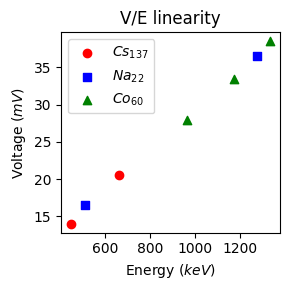

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3, 3))


# plot kev vs V
ax.scatter([cs137_compton_kev, cs137_photopeak_kev], [cs137_compton_V, cs137_photopeak_V], label=r'$Cs_{137}$', color = 'red', marker='o')
ax.scatter([na22_photopeak_kev, na22_photopeak2_kev], [na22_photopeak_V, na22_photopeak2_V], label=r'$Na_{22}$', color='blue', marker = 's')
ax.scatter([co60_compton_kev, co60_photopeak_kev, co60_photopeak2_kev], [co60_compton_V, co60_photopeak_V, co60_photopeak2_V], label=r'$Co_{60}$', color = 'green', marker = '^')
ax.set_title('V/E linearity')

ax.set_xlabel(r'Energy $(keV)$')
ax.set_ylabel(r'Voltage $(mV)$')
ax.legend()
plt.tight_layout()
if SAVE_PLOTS:
    plt.savefig('plots/sipm_spectroscopy/kev_vs_V_10min_guesses.jpg', dpi=300)
plt.show()
